# Housing Prices Prediction

In [1]:
# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset

In [4]:
df = pd.read_csv('House_Prices_Prediction_Dataset.csv')

In [5]:
# Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   PARK_FACIL     7109 non-null   object 
 8   DATE_BUILD     7109 non-null   object 
 9   QS_OVERALL     7061 non-null   float64
 10  REG_FEE        7109 non-null   int64  
 11  SALES_PRICE    7109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 666.6+ KB


In [7]:
# Checking for the missing values

In [8]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
PARK_FACIL        0
DATE_BUILD        0
QS_OVERALL       48
REG_FEE           0
SALES_PRICE       0
dtype: int64

In [9]:
df['BHK'] = df['N_BEDROOM'] 

In [10]:
df.dropna(axis=0,inplace=True)

# Feature Selection

In [11]:
# Data cleaning

In [12]:
df1=pd.DataFrame(df['N_BEDROOM'])
df2=pd.DataFrame(df['N_BATHROOM'])
df3=pd.DataFrame(df['BHK'])

In [13]:
df['N_BEDROOM'] = df1.apply(np.int64)
df['N_BATHROOM'] = df2.apply(np.int64)
df['BHK'] = df3.apply(np.int64)

In [14]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_392\2258718761.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])


In [15]:
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_392\2037570131.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])


In [16]:
df.drop('PRT_ID',axis=1,inplace=True)
df.drop('REG_FEE',axis=1,inplace=True)

In [17]:
df['SALES_PRICES'] = df['SALES_PRICE']

In [18]:
df.drop('SALES_PRICE',axis=1,inplace=True)

In [19]:
df = df.rename(columns = {"SALES_PRICES":"SALES_PRICE"})

In [20]:
df.columns = ['Area','Int_Sqrt','Date_Sale','Dist_Mainroad','N_Bedroom','N_Bathroom','Park_Facil','Date_Build','QS_Overall','BHK','Sales_Price']

In [21]:
df['Property_Age'] = pd.DatetimeIndex(df.Date_Sale).year - pd.DatetimeIndex(df.Date_Build).year

In [22]:
df['Park_Facil'].replace('Yes',1,inplace=True)
df['Park_Facil'].replace('No',0,inplace=True)

In [23]:
df['Sales_Prices']=df['Sales_Price']
df.drop('Sales_Price',axis=1,inplace=True)
df=df.rename(columns={"Sales_Prices":"Sales_Price"})

In [24]:
df['Area'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar', 'Chengalpattu', 'Ennore'], dtype=object)

In [25]:
df['Area'].value_counts()

Chrompet        1676
Karapakkam      1356
KK Nagar         989
Velachery        973
Anna Nagar       772
Adyar            768
T Nagar          495
Chengalpattu      21
Ennore             6
Name: Area, dtype: int64

In [26]:
df['N_Bedroom'].unique()

array([1, 2, 3, 4], dtype=int64)

In [27]:
df['N_Bathroom'].unique()

array([1, 2], dtype=int64)

In [28]:
df['BHK'].unique()

array([1, 2, 3, 4], dtype=int64)

In [29]:
# Visualizing the correlations between features

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_392\428500550.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt ='.2f')


<Axes: >

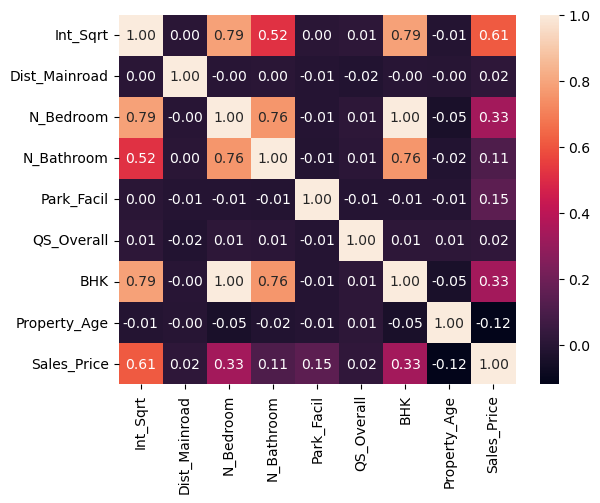

In [30]:
sns.heatmap(df.corr(),annot=True,fmt ='.2f')

# Data Visualization

In [31]:
# Univarite

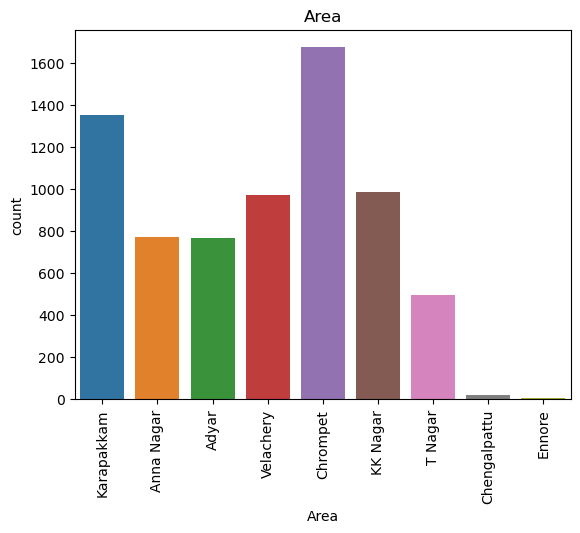

In [32]:
sns.countplot(x=df['Area'])
plt.title('Area')
plt.xticks(rotation=90)
plt.show()

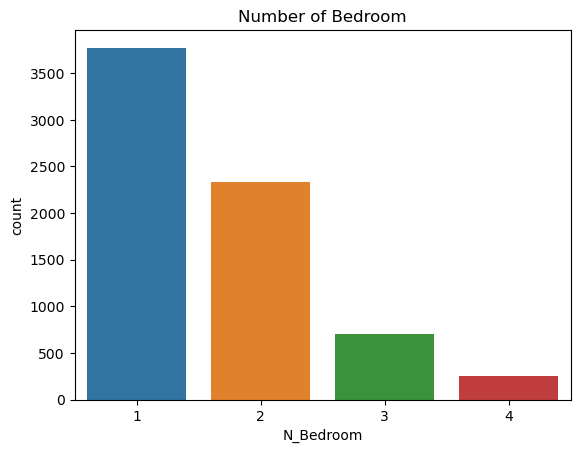

In [33]:
sns.countplot(x=df['N_Bedroom'])
plt.title('Number of Bedroom')
plt.show()

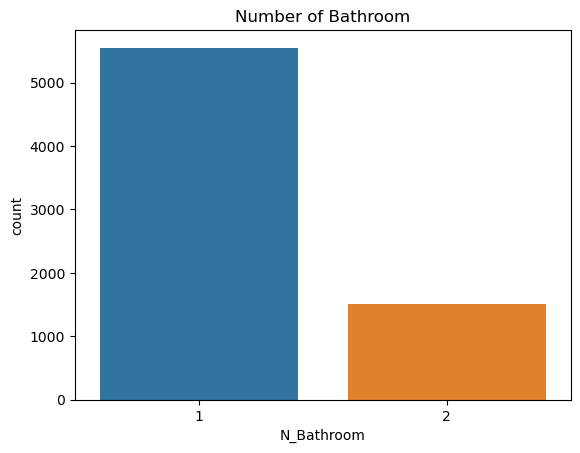

In [34]:
sns.countplot(x=df['N_Bathroom'])
plt.title('Number of Bathroom')
plt.show()

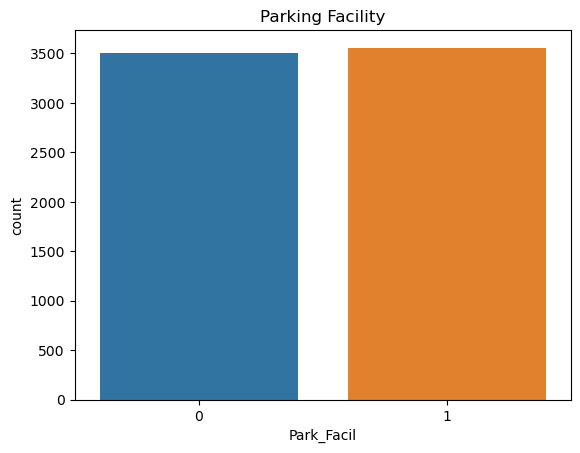

In [35]:
sns.countplot(x=df['Park_Facil'])
plt.title('Parking Facility')
plt.show()

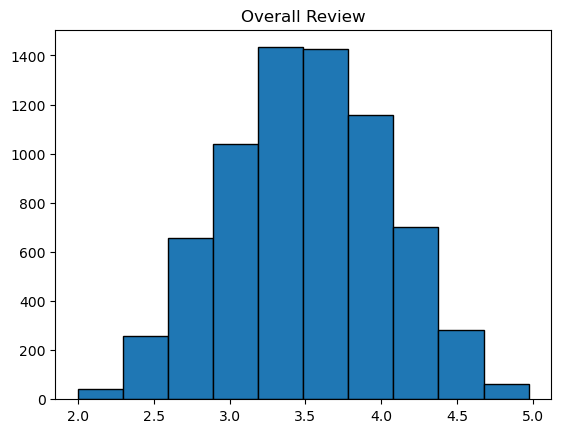

In [36]:
plt.hist(df['QS_Overall'],edgecolor='black')
plt.title('Overall Review')
plt.show()

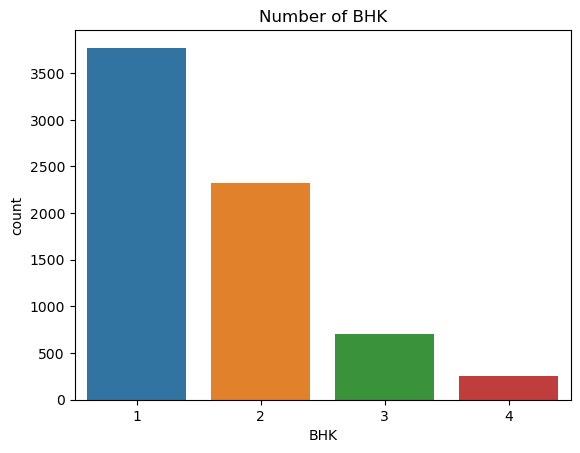

In [37]:
sns.countplot(x=df['BHK'])
plt.title('Number of BHK')
plt.show()

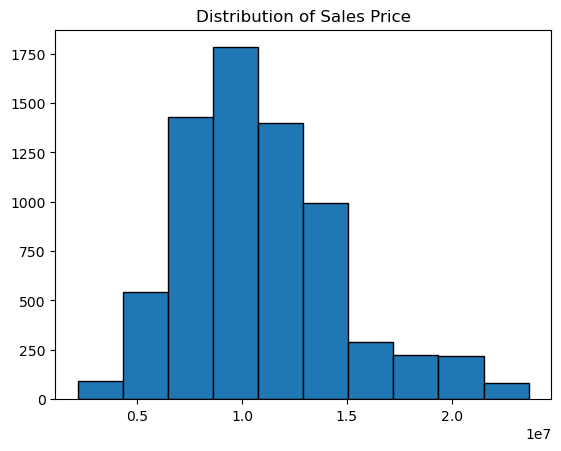

In [38]:
plt.hist(df['Sales_Price'],edgecolor='black')
plt.title('Distribution of Sales Price')
plt.show()

# Bivarite

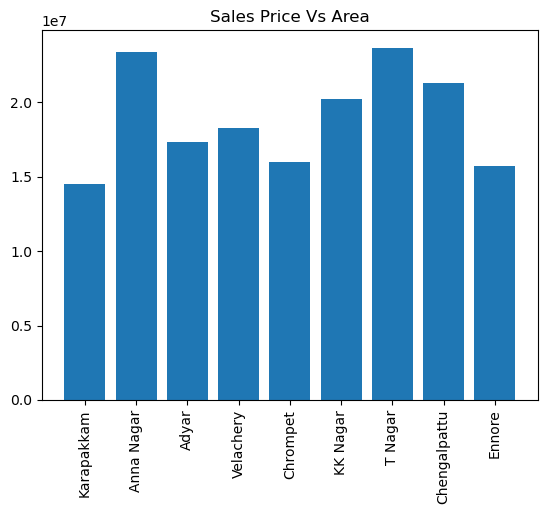

In [39]:
plt.bar(df['Area'], df['Sales_Price'])
plt.xticks(rotation=90)
plt.title('Sales Price Vs Area')
plt.show()

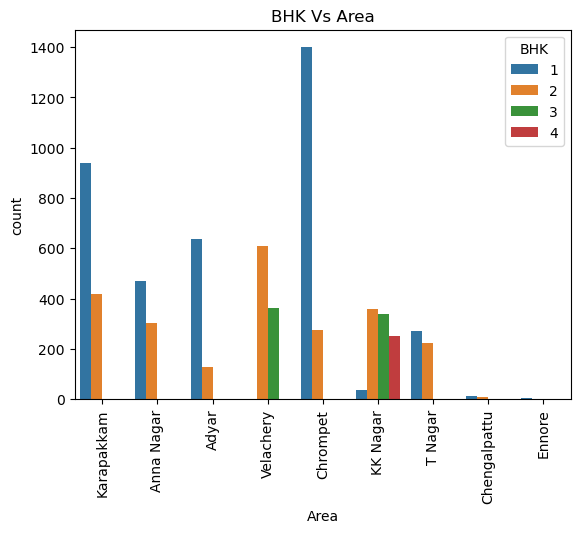

In [40]:
sns.countplot(x='Area', hue = 'BHK', data =df)
plt.xticks(rotation=90)
plt.title('BHK Vs Area')
plt.show()

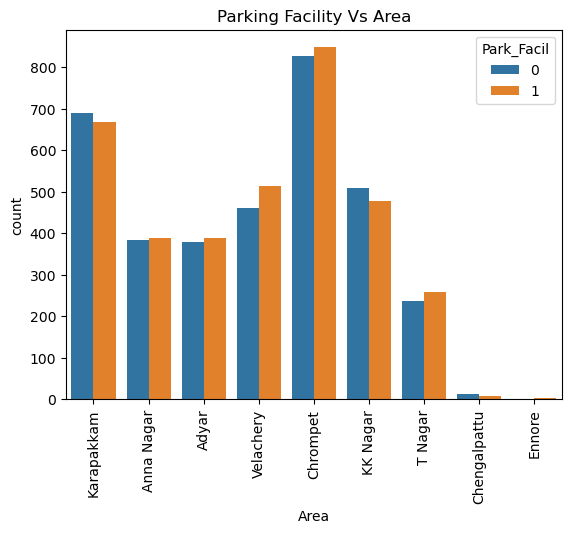

In [41]:
sns.countplot(x='Area', hue = 'Park_Facil', data =df)
plt.xticks(rotation=90)
plt.title('Parking Facility Vs Area')
plt.show()

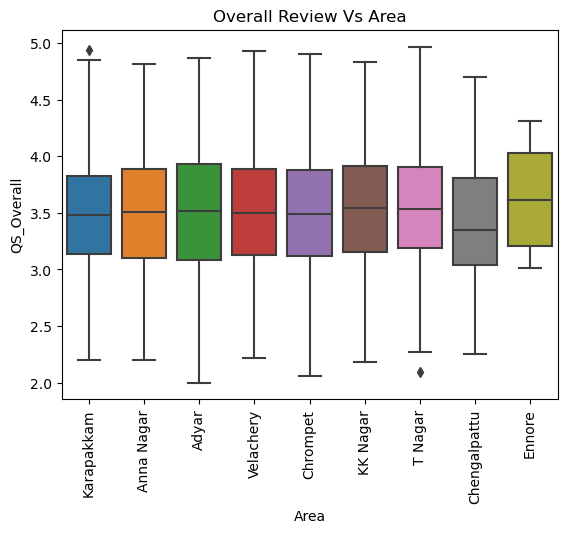

In [42]:
sns.boxplot(x=df['Area'], y=df['QS_Overall'])
plt.xticks(rotation=90)
plt.title('Overall Review Vs Area')
plt.show()

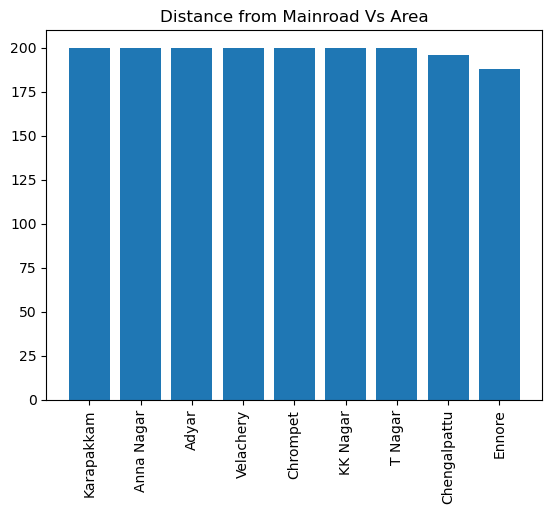

In [43]:
plt.bar(df['Area'], df['Dist_Mainroad'])
plt.xticks(rotation=90)
plt.title('Distance from Mainroad Vs Area')
plt.show()

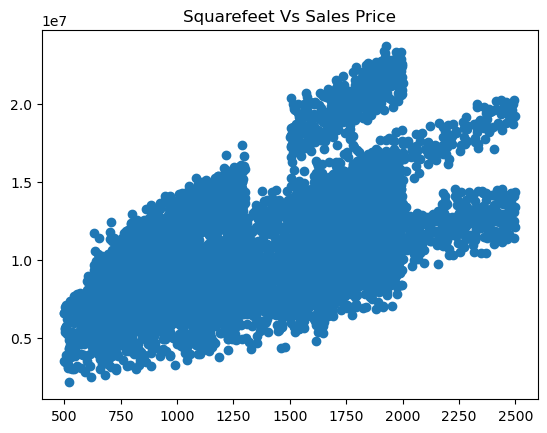

In [44]:
plt.scatter(df['Int_Sqrt'], df['Sales_Price'])
plt.title('Squarefeet Vs Sales Price')
plt.show()

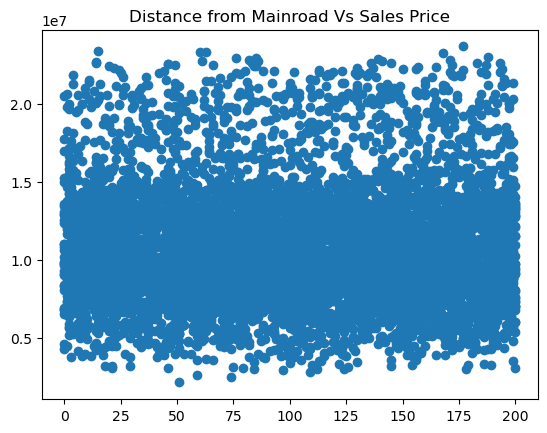

In [45]:
plt.scatter(df['Dist_Mainroad'], df['Sales_Price'])
plt.title('Distance from Mainroad Vs Sales Price')
plt.show()

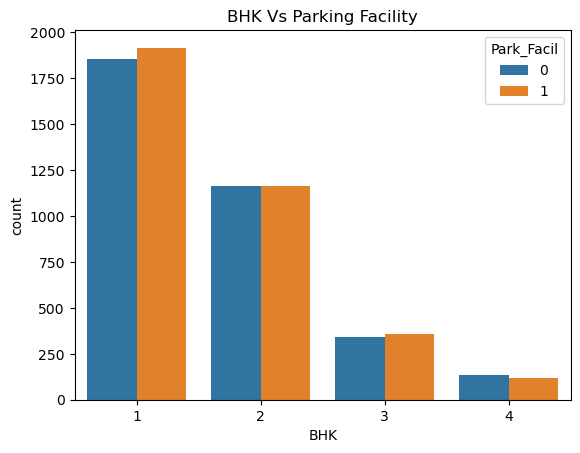

In [46]:
sns.countplot(x= df['BHK'], hue=df['Park_Facil'])
plt.title('BHK Vs Parking Facility')
plt.show()

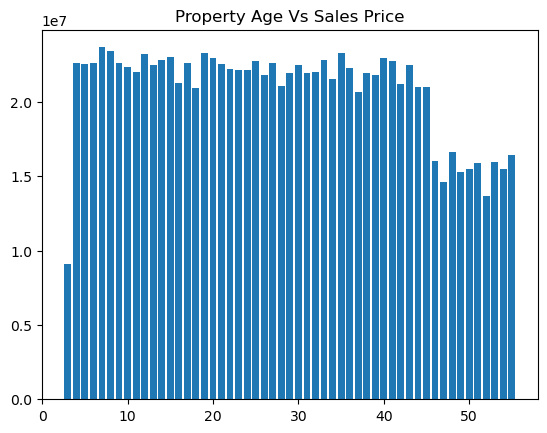

In [47]:
plt.bar(df['Property_Age'],df['Sales_Price'])
plt.title('Property Age Vs Sales Price')
plt.show()

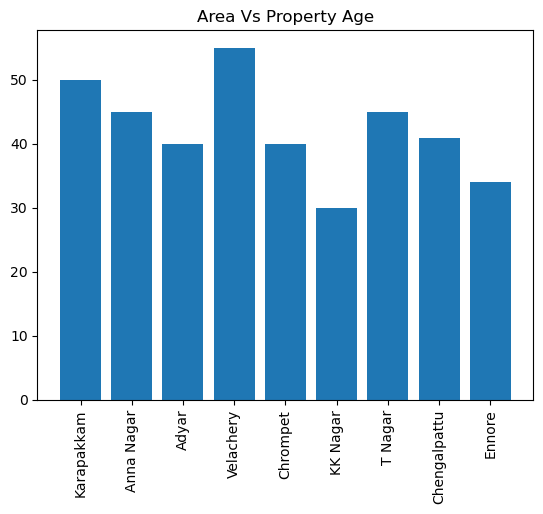

In [48]:
plt.bar(df['Area'],df['Property_Age'])
plt.xticks(rotation=90)
plt.title('Area Vs Property Age')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_392\4088354245.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Int_Sqrt'])


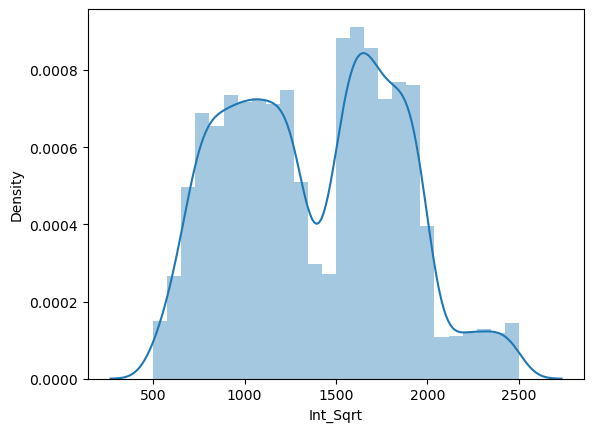

In [49]:
sns.distplot(df['Int_Sqrt'])
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_392\3936960197.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Property_Age'])


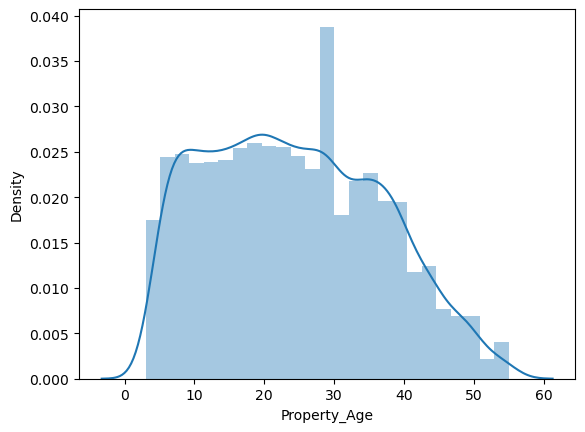

In [50]:
sns.distplot(df['Property_Age'])
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_392\3247983492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales_Price'])


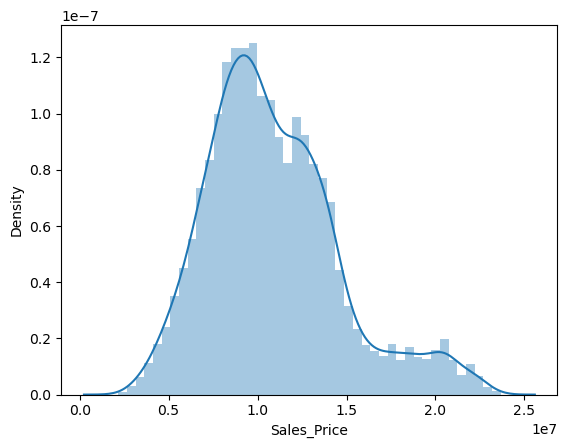

In [51]:
sns.distplot(df['Sales_Price'])
plt.show()

In [52]:
df.describe()

,Int_Sqrt,Dist_Mainroad,N_Bedroom,N_Bathroom,Park_Facil,QS_Overall,BHK,Property_Age,Sales_Price
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03
mean,1381.316752,99.569161,1.636621,1.213152,0.504110,3.503389,1.636621,24.273526,1.088801e+07
std,457.860850,57.403870,0.803633,0.409563,0.500019,0.527313,0.803633,12.331565,3.769081e+06
min,500.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,3.000000,2.156875e+06
25%,991.000000,50.000000,1.000000,1.000000,0.000000,3.130000,1.000000,14.000000,8.266790e+06
50%,1369.500000,99.000000,1.000000,1.000000,1.000000,3.500000,1.000000,23.000000,1.031922e+07
75%,1744.000000,148.000000,2.000000,1.000000,1.000000,3.890000,2.000000,34.000000,1.298148e+07
max,2500.000000,200.000000,4.000000,2.000000,1.000000,4.970000,4.000000,55.000000,2.366734e+07


# Separate Target data and Features

In [53]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [54]:
X.drop('Date_Sale',axis=1, inplace=True)

In [55]:
X.drop('Date_Build',axis=1, inplace=True)

In [56]:
X

,Area,Int_Sqrt,Dist_Mainroad,N_Bedroom,N_Bathroom,Park_Facil,QS_Overall,BHK,Property_Age
0,Karapakkam,1004,131,1,1,1,4.330,1,44
1,Anna Nagar,1986,26,2,1,0,3.765,2,11
2,Adyar,909,70,1,1,1,3.090,1,20
3,Velachery,1855,14,3,2,0,4.010,3,22
4,Karapakkam,1226,84,1,1,1,3.290,1,30
...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,0,2.520,1,49
7105,Velachery,1897,52,3,2,1,3.920,3,9
7106,Velachery,1614,152,2,1,0,3.840,2,28
7107,Karapakkam,787,40,1,1,1,4.160,1,32


# Categorical Encoding

In [57]:
X_new = pd.get_dummies(X,drop_first=True)

In [58]:
X_new

,Int_Sqrt,Dist_Mainroad,N_Bedroom,N_Bathroom,Park_Facil,QS_Overall,BHK,Property_Age,Area_Anna Nagar,Area_Chengalpattu,Area_Chrompet,Area_Ennore,Area_KK Nagar,Area_Karapakkam,Area_T Nagar,Area_Velachery
0,1004,131,1,1,1,4.330,1,44,0,0,0,0,0,1,0,0
1,1986,26,2,1,0,3.765,2,11,1,0,0,0,0,0,0,0
2,909,70,1,1,1,3.090,1,20,0,0,0,0,0,0,0,0
3,1855,14,3,2,0,4.010,3,22,0,0,0,0,0,0,0,1
4,1226,84,1,1,1,3.290,1,30,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1,1,0,2.520,1,49,0,0,0,0,0,1,0,0
7105,1897,52,3,2,1,3.920,3,9,0,0,0,0,0,0,0,1
7106,1614,152,2,1,0,3.840,2,28,0,0,0,0,0,0,0,1
7107,787,40,1,1,1,4.160,1,32,0,0,0,0,0,1,0,0


# Feature Scaling

In [59]:
from sklearn.preprocessing import MinMaxScaler
mns = MinMaxScaler()
X_data = mns.fit_transform(X_new)

# Splitting the data into Train and Testing part

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y,test_size=0.2)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5644, 16)
(1412, 16)
(5644,)
(1412,)


# Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [63]:
lr.score(X_train,Y_train)

0.60176754553808

# Prediction

In [64]:
Y_predict = lr.predict(X_test)

In [65]:
Y_predict.mean()

10925659.309542432

In [66]:
Y_test.mean()

10958216.182719547

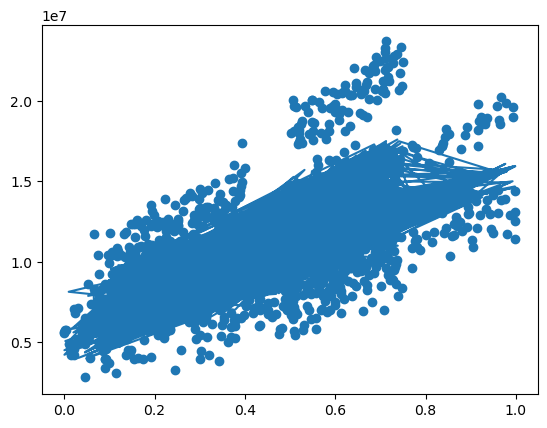

In [67]:
plt.scatter(X_test[:,0],Y_test)
plt.plot(X_test[:,0],Y_predict)

In [68]:
lr.score(X_test,Y_test)

0.5947766981463516

# Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X_train,Y_train,cv=5).mean()

0.5977192685655783

In [70]:
cross_val_score(lr,X_test,Y_test,cv=5).mean()

0.5892216805630127